# Multimachine

In [1]:
%%capture
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_Multimachine_DQ_Parallel

In [4]:
import pandas as pd
from dpsim.MeasurementUtils import Measurement
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logs_dir = '../../../logs_multimachine/'
gen_mean = []
gen_max = []
gen_std = []

for gens in range(1,21):    
    for threads in range(0,13,2):   
        seq_meas = []
        for seq in range(1,51):
            log_path =  logs_dir + 'DP_Multimachine_th' + str(threads) + '_gen' + str(gens) + '_rep' + str(seq) + '/' \
                        + 'DP_Multimachine_th' + str(threads) + '_gen' + str(gens) + '_rep' + str(seq) + '_step_times.log'          
            #print(log_path)
            meas = Measurement.read_timestep_csv(log_path)['step_time'].data
            # aggregate the measurements from the different iterations
            seq_meas = np.concatenate( (seq_meas, meas), axis=0)
            
        #print(seq_meas.shape)
        #coupled_meas.append({'copies': copies, 'threads': threads, 'values': meas['step_time'].data})         
        gen_mean.append({'copies': gens, 'threads': threads, 'values': seq_meas.mean()})   
        gen_max.append({'copies': gens, 'threads': threads, 'values': seq_meas.max()})   
        gen_std.append({'copies': gens, 'threads': threads, 'values': seq_meas.std()})   
        
#pd_coupled_meas = pd.DataFrame(coupled_meas)
pd_gen_mean = pd.DataFrame(gen_mean)
pd_gen_max = pd.DataFrame(gen_max)
pd_gen_std = pd.DataFrame(gen_std)

In [ ]:
pd_gen_mean

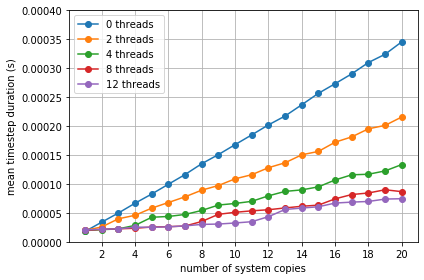

In [7]:
import matplotlib.ticker as ticker

ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

xaxis = np.arange(1,21)
plt.plot(xaxis, pd_gen_mean.query('threads=='+str(0))['values'].values, label=str(0)+' threads', marker='o')
plt.plot(xaxis, pd_gen_mean.query('threads=='+str(2))['values'].values, label=str(2)+' threads', marker='o')
plt.plot(xaxis, pd_gen_mean.query('threads=='+str(4))['values'].values, label=str(4)+' threads', marker='o')
plt.plot(xaxis, pd_gen_mean.query('threads=='+str(8))['values'].values, label=str(8)+' threads', marker='o')
plt.plot(xaxis, pd_gen_mean.query('threads=='+str(12))['values'].values, label=str(12)+' threads', marker='o')

plt.ylim([0,0.0004])

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('multimachine_parallel.pdf')